<a href="https://colab.research.google.com/github/vahedshaik/cmpe258_neural_networks/blob/main/Asst3_part_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**B)Write a colab in pytorch from scratch - 3 layer deep neural network for non linear regression without using pytorch builtin layer functionality.**

In [ ]:
# Importing necessary libraries
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import torch.optim as optim
from typing import Callable

In [ ]:
#Generate non-linear data and Initialize weights and bias
n = 1000
dim = 3
x = torch.rand(n, dim).float()
print('Input tensor shape =', x.shape)
weights = torch.tensor([[2.0, -3.0, 6.0]]).T
bias = torch.tensor([[8]])
print('Weights shape =', weights.shape)
print('Bias shape =', bias.shape)

# non-linear 3 variable function we want to learn
y_true = (torch.einsum('ij, jk -> ik', (x**3),  weights) + torch.einsum('ij, jk -> ik', (x**2),  weights) + torch.einsum('ij, jk -> ik', x, weights) + bias).float()
print('Function output shape =', y_true.shape)

Input tensor shape = torch.Size([1000, 3])
Weights shape = torch.Size([3, 1])
Bias shape = torch.Size([1, 1])
Function output shape = torch.Size([1000, 1])


Hyperparamter initializations

In [ ]:
input_dim = d
output_dim = 1
hidden_dim = 20

learning_rate = 0.01
num_epochs = 200

In [ ]:
class Model(torch.nn.Module):
  def __init__(self, input_dim, output_dim, hidden_dim):
    super(Model, self).__init__()
    self.W1 = torch.nn.Parameter(torch.randn(input_dim, hidden_dim), requires_grad=True)
    self.b1 = torch.nn.Parameter(torch.randn(hidden_dim), requires_grad=True)
    self.W2 = torch.nn.Parameter(torch.randn(hidden_dim, hidden_dim), requires_grad=True)
    self.b2 = torch.nn.Parameter(torch.randn(hidden_dim), requires_grad=True)
    self.W3 = torch.nn.Parameter(torch.randn(hidden_dim, output_dim), requires_grad=True)
    self.b3 = torch.nn.Parameter(torch.randn(output_dim), requires_grad=True)

  def forward(self, x):
    h1 = torch.relu(torch.matmul(x, self.W1) + self.b1)
    h2 = torch.relu(torch.matmul(h1, self.W2) + self.b2)
    y_pred = torch.matmul(h2, self.W3) + self.b3
    return y_pred

In [ ]:
model = Model(input_dim, output_dim, hidden_dim)
loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
loss_ = []
for epoch in range(num_epochs):
  optimizer.zero_grad()
  y_pred = model(x)
  loss_value = loss(y_pred, y_true)
  print(f'Epoch {epoch}, loss {loss_value}')
  loss_value.backward()
  optimizer.step()
  loss_.append(loss_value.detach().numpy())

Epoch 0, loss 296.0053405761719
Epoch 1, loss 262.8136291503906
Epoch 2, loss 231.64073181152344
Epoch 3, loss 202.5612335205078
Epoch 4, loss 175.62794494628906
Epoch 5, loss 151.1425323486328
Epoch 6, loss 129.400390625
Epoch 7, loss 110.56282806396484
Epoch 8, loss 94.62442779541016
Epoch 9, loss 81.20066833496094
Epoch 10, loss 70.05691528320312
Epoch 11, loss 61.247459411621094
Epoch 12, loss 54.72821044921875
Epoch 13, loss 50.48503112792969
Epoch 14, loss 48.165382385253906
Epoch 15, loss 47.251712799072266
Epoch 16, loss 47.2218132019043
Epoch 17, loss 47.515357971191406
Epoch 18, loss 47.655921936035156
Epoch 19, loss 47.29387664794922
Epoch 20, loss 46.23826599121094
Epoch 21, loss 44.474708557128906
Epoch 22, loss 42.11924362182617
Epoch 23, loss 39.36403274536133
Epoch 24, loss 36.43296432495117
Epoch 25, loss 33.52273178100586
Epoch 26, loss 30.79107666015625
Epoch 27, loss 28.350954055786133
Epoch 28, loss 26.243553161621094
Epoch 29, loss 24.47738265991211
Epoch 30, loss

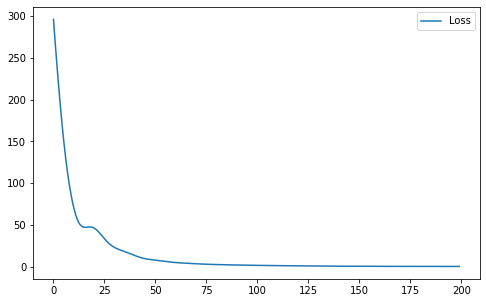

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(num_epochs), loss_, label='Loss')
plt.legend()

In [ ]:
model = Model(input_dim, output_dim, hidden_dim)
loss = torch.nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_value.backward()
optimizer.step()
y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

tensor(47.2324, grad_fn=<MseLossBackward0>)
tensor(33.6375, grad_fn=<MseLossBackward0>)


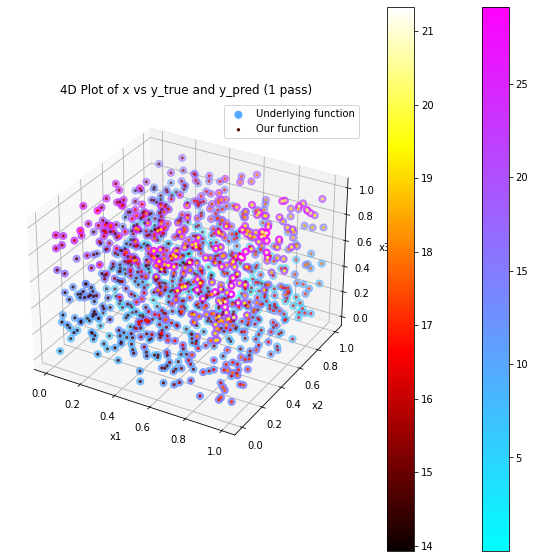

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_true, cmap='cool', label='Underlying function', s=50)
fig.colorbar(sc)
sc = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y_pred.detach().numpy(), cmap='hot', label='Our function', marker='.')
fig.colorbar(sc)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('4D Plot of x vs y_true and y_pred (1 pass)')

plt.legend()
plt.show()